In [95]:
#import kagglehub
#from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
edudf = pd.read_csv('data/International_Education_Costs.csv')
print(edudf.info())
print(edudf.describe())
print(edudf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB
None
       Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  \
count      907.000000    907.000000         907.000000   907.000000   
mean         

In [97]:
print(f'The number of nulls in each column: {edudf.columns.isnull().sum()}')
print(f'The number of nas in each columns: {edudf.columns.isna().sum()}')
print(f'The number of unique countries in the Country column: {len(edudf.Country.unique())}')
print(f'The number of unique cities in the City column: {len(edudf.City.unique())}')
print(f'The number of unique universities in the University column: {len(edudf.University.unique())}')
print(f'The number of unique programs in the Program column: {len(edudf.Program.unique())}')
print(f'The number of unique levels in the Level column: {len(edudf.Level.unique())}')


The number of nulls in each column: 0
The number of nas in each columns: 0
The number of unique countries in the Country column: 71
The number of unique cities in the City column: 556
The number of unique universities in the University column: 622
The number of unique programs in the Program column: 92
The number of unique levels in the Level column: 3


In [98]:
#Country-wise and degree-wise cost comparisons
#Define Incountry_Cost: Tuition_USD + (Duration_Years * 12 * Rent_USD ) + (Duration_Years * Insurance_USD)
#Define International_Cost: Visa_Fee_USD + Tuition_USD + (Duration_Years * 12 * Rent_USD ) + (Duration_Years * Insurance_USD)
#Assumptions student is able to 6 month, .5 year, leases and policies, however if student is only able to work in years all durations should use ceiling rounding

edudf['Incountry_Cost'] = edudf['Tuition_USD'] + (edudf['Duration_Years'] * 12 * edudf['Rent_USD']) + (edudf['Duration_Years'] * edudf['Insurance_USD'])
edudf['International_Cost'] = edudf['Visa_Fee_USD'] + edudf['Tuition_USD'] + (edudf['Duration_Years'] * 12 * edudf['Rent_USD']) + (edudf['Duration_Years'] * edudf['Insurance_USD'])

#Create Group By variables to use for analysis
avg_incountry_cost_by_country = edudf[['Country','Incountry_Cost']].groupby(['Country']).mean()
avg_incountry_cost_by_degree = edudf[['Program','Incountry_Cost']].groupby(['Program']).mean()
avg_international_cost_by_country = edudf[['Country','International_Cost']].groupby(['Country']).mean()
avg_international_cost_by_degree = edudf[['Program','International_Cost']].groupby(['Program']).mean()

The most expensive country on average:
         Incountry_Cost
Country                
USA       127588.461538


The least expensive country on average:
         Incountry_Cost
Country                
Tunisia     7713.333333


The countries whose cost falls between 9122.33 and 54071.68, one standard deviation of the mean:
                    Incountry_Cost
Country                           
Argentina             13716.666667
Austria               28983.333333
Bahrain               33856.000000
Belgium               34581.111111
Brazil                17340.000000
Bulgaria              14420.000000
China                 28900.000000
Colombia              15610.000000
Croatia               18056.666667
Cyprus                26306.666667
Czech Republic        34400.000000
Denmark               35283.333333
Dominican Republic    17256.000000
Ecuador               19924.000000
Egypt                 14740.000000
El Salvador           17364.000000
Finland               28481.818182
France     

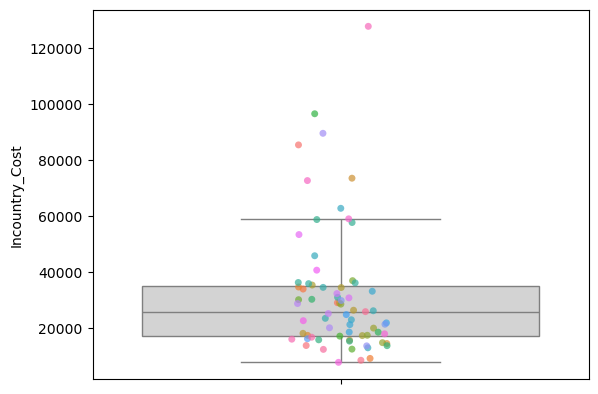

In [99]:
max_value = avg_incountry_cost_by_country['Incountry_Cost'].max()
min_value = avg_incountry_cost_by_country['Incountry_Cost'].min()
mean_value = avg_incountry_cost_by_country['Incountry_Cost'].mean()
std_dev = avg_incountry_cost_by_country['Incountry_Cost'].std()

max = avg_incountry_cost_by_country[(avg_incountry_cost_by_country['Incountry_Cost'] == max_value)]
min = avg_incountry_cost_by_country[(avg_incountry_cost_by_country['Incountry_Cost'] == min_value)]
avg = avg_incountry_cost_by_country[(avg_incountry_cost_by_country['Incountry_Cost'] >= mean_value - std_dev) & (avg_incountry_cost_by_country['Incountry_Cost'] <= mean_value + std_dev)]
                                    
print(f'The most expensive country on average:\n{max}')
print('\n')
print(f'The least expensive country on average:\n{min}')
print('\n')
print(f'The countries whose cost falls between {round(mean_value - std_dev, 2)} and {round(mean_value + std_dev, 2)}, one standard deviation of the mean:\n{avg}')

box = sns.boxplot(data= avg_incountry_cost_by_country, y = 'Incountry_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = avg_incountry_cost_by_country, y = 'Incountry_Cost', alpha = .7, hue = 'Country', legend = False)

The most expensive degree on average:
                  Incountry_Cost
Program                         
Machine Learning        157500.0


The least expensive degree on average:
                        Incountry_Cost
Program                               
Electronic Engineering         12000.0


The degrees whose cost falls between 20071.66 and 77190.92, one standard deviation of the mean:
                         Incountry_Cost
Program                                
AI Engineering             21620.000000
Applied Mathematics        21400.000000
Architecture               42025.000000
Artificial Intelligence    41383.962264
Bioinformatics             29776.000000
...                                 ...
Software Systems           36466.666667
Sustainable Energy         24300.000000
Sustainable Technology     29600.000000
Systems Engineering        20600.000000
Technology & Innovation    71400.000000

[72 rows x 1 columns]


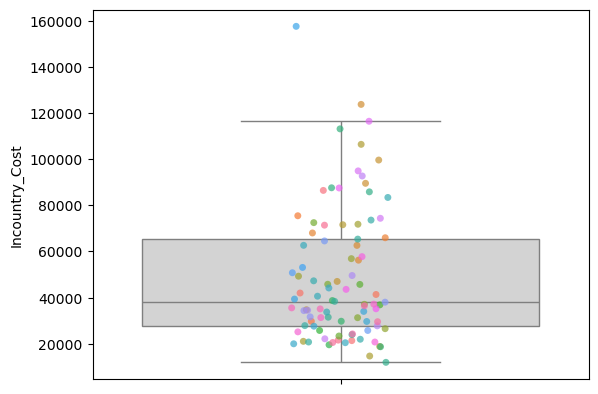

In [100]:
max_value = avg_incountry_cost_by_degree['Incountry_Cost'].max()
min_value = avg_incountry_cost_by_degree['Incountry_Cost'].min()
mean_value = avg_incountry_cost_by_degree['Incountry_Cost'].mean()
std_dev = avg_incountry_cost_by_degree['Incountry_Cost'].std()

max = avg_incountry_cost_by_degree[(avg_incountry_cost_by_degree['Incountry_Cost'] == max_value)]
min = avg_incountry_cost_by_degree[(avg_incountry_cost_by_degree['Incountry_Cost'] == min_value)]
avg = avg_incountry_cost_by_degree[(avg_incountry_cost_by_degree['Incountry_Cost'] >= mean_value - std_dev) & (avg_incountry_cost_by_degree['Incountry_Cost'] <= mean_value + std_dev)]
                                    
print(f'The most expensive degree on average:\n{max}')
print('\n')
print(f'The least expensive degree on average:\n{min}')
print('\n')
print(f'The degrees whose cost falls between {round(mean_value - std_dev, 2)} and {round(mean_value + std_dev, 2)}, one standard deviation of the mean:\n{avg}')

box = sns.boxplot(data= avg_incountry_cost_by_degree, y = 'Incountry_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = avg_incountry_cost_by_degree, y = 'Incountry_Cost', alpha = .7, hue = 'Program', legend = False)

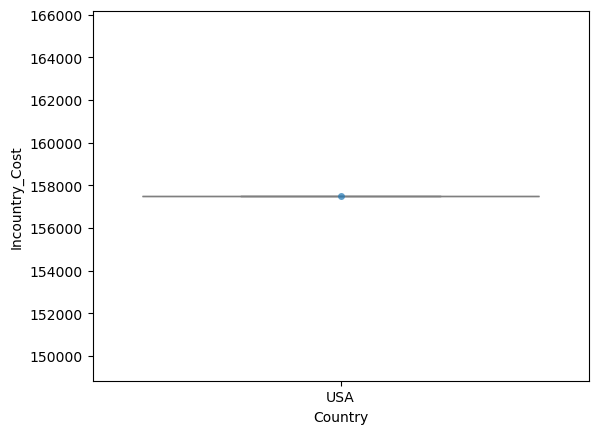

In [101]:
filter = (edudf['Program'].isin(['Machine Learning']))
box = sns.boxplot(data=edudf[filter], x = 'Country', y = 'Incountry_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = edudf[filter], x = 'Country', y = 'Incountry_Cost', alpha = .7)